# Census - Median Household Income (MHI)

#### This notebook contains code for gathering Census data tables and converting them to dataframes. 
#### Please use caution when altering this code.

In [1]:
import pandas as pd
from census import Census #<-- Python wrapper for census API
import requests
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as sts

# Census API Key
from config import api_key

# provide the api key and the year to establish a session
c = Census(api_key, year=2018)

# Set an option to allow up to 300 characters to print in each column
pd.set_option('max_colwidth', 300)

In [2]:
tables = c.acs5.tables()

# The tables variable contains a list of dicts, so we can convert directly to a dataframe
table_df = pd.DataFrame(tables)

##### The cell below gathering columns names from the Census Total Population table that only contain estimate and are int data types.
##### Those table names are added to a string variable and then pulled from the census data.
##### Dictionary key names are replaced withe more meaningful names.
##### Data is saved to a dataframe and exported as a csv file.

In [3]:
table_id = 'B19013'      

# Capture the variables URL from the table_df
url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make the API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")

table_info = variables[(variables['predicateType']=='int') & (variables['label'].str.contains("Estimate"))]   


table_columns = ""
for ind in table_info.index:       
    table_columns = table_columns + f"{ind},"
    
    
column_list = table_columns[:-1]

census_data = c.acs5.get(("NAME", column_list), 
                          {'for': 'county:*'})

# for i in range(len(table_info)) : 
#     for d in census_data:
#         d[table_info.iloc[i, 0]] = d.pop(table_info.index[i]) 
    

census_B19013_MHI_df = pd.DataFrame(census_data)
census_B19013_MHI_df.to_csv("census_B19013_MHI.csv", encoding="utf-8", index=False )
census_B19013_MHI_df

print(type(census_data))
print(census_data)

Number of available variables: 4
<class 'list'>
[{'NAME': 'Washington County, Mississippi', 'B19013_001E': 30834.0, 'state': '28', 'county': '151'}, {'NAME': 'Perry County, Mississippi', 'B19013_001E': 39007.0, 'state': '28', 'county': '111'}, {'NAME': 'Choctaw County, Mississippi', 'B19013_001E': 37203.0, 'state': '28', 'county': '019'}, {'NAME': 'Itawamba County, Mississippi', 'B19013_001E': 40510.0, 'state': '28', 'county': '057'}, {'NAME': 'Carroll County, Mississippi', 'B19013_001E': 43060.0, 'state': '28', 'county': '015'}, {'NAME': 'Grenada County, Mississippi', 'B19013_001E': 36877.0, 'state': '28', 'county': '043'}, {'NAME': 'Jefferson County, Mississippi', 'B19013_001E': 20188.0, 'state': '28', 'county': '063'}, {'NAME': 'Greene County, Mississippi', 'B19013_001E': 49447.0, 'state': '28', 'county': '041'}, {'NAME': 'Marshall County, Mississippi', 'B19013_001E': 41572.0, 'state': '28', 'county': '093'}, {'NAME': 'Quitman County, Mississippi', 'B19013_001E': 25510.0, 'state': '

### Census MHI Column Changes

In [4]:
census_B19013_MHI_df.dtypes

census_B19013_MHI_df['COUNTYFP'] = census_B19013_MHI_df['state'] + census_B19013_MHI_df['county']

census_MHI_sorted = census_B19013_MHI_df.sort_values(by=['COUNTYFP'])
census_MHI_sorted = census_MHI_sorted.reset_index(drop=True)

census_MHI_sorted['State Name'] = ''
census_MHI_sorted['County Name'] = ''


for index, row in census_MHI_sorted.iterrows():
    name_all = row['NAME']
    name_list = name_all.split(',')
    clean_state = name_list[1][1:]
    census_MHI_sorted.loc[index, 'State Name']= clean_state
    census_MHI_sorted.loc[index, 'County Name']= name_list[0]
    
census_MHI_sorted.head()

,NAME,B19013_001E,state,county,COUNTYFP,State Name,County Name
0,"Autauga County, Alabama",58786.0,01,001,01001,Alabama,Autauga County
1,"Baldwin County, Alabama",55962.0,01,003,01003,Alabama,Baldwin County
2,"Barbour County, Alabama",34186.0,01,005,01005,Alabama,Barbour County
3,"Bibb County, Alabama",45340.0,01,007,01007,Alabama,Bibb County
4,"Blount County, Alabama",48695.0,01,009,01009,Alabama,Blount County


In [5]:
tables = c.acs5.tables()

# The tables variable contains a list of dicts, so we can convert directly to a dataframe
table_df = pd.DataFrame(tables)

In [6]:
table_id = 'B01003'   

# Capture the variables URL from the table_df
url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make the API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")

table_info = variables[(variables['predicateType']=='int') & (variables['label'].str.contains("Estimate"))]   


table_columns = ""
for ind in table_info.index:       
    table_columns = table_columns + f"{ind},"
    
    
column_list = table_columns[:-1]
census_data = c.acs5.get(("NAME", column_list), 
                          {'for': 'county:*'})

for i in range(len(table_info)) : 
    for d in census_data:
        d[table_info.iloc[i, 0]] = d.pop(table_info.index[i]) 
    

census_B01003_TotalPop_df = pd.DataFrame(census_data)
census_B01003_TotalPop_df.to_csv("census_B01003_TotalPop.csv", encoding="utf-8", index=False )
census_B01003_TotalPop_df

Number of available variables: 4


,NAME,state,county,Estimate!!Total
0,"Washington County, Mississippi",28,151,47086.0
1,"Perry County, Mississippi",28,111,12028.0
2,"Choctaw County, Mississippi",28,019,8321.0
3,"Itawamba County, Mississippi",28,057,23480.0
4,"Carroll County, Mississippi",28,015,10129.0
...,...,...,...,...
3215,"Clayton County, Iowa",19,043,17672.0
3216,"Buena Vista County, Iowa",19,021,20260.0
3217,"Guthrie County, Iowa",19,077,10674.0
3218,"Humboldt County, Iowa",19,091,9566.0


In [7]:
census_B01003_TotalPop_df.dtypes

census_B01003_TotalPop_df['COUNTYFP'] = census_B01003_TotalPop_df['state'] + census_B01003_TotalPop_df['county']

census_TotalPop_sorted = census_B01003_TotalPop_df.sort_values(by=['COUNTYFP'])
census_TotalPop_sorted = census_TotalPop_sorted.reset_index(drop=True)

census_TotalPop_sorted['State Name'] = ''
census_TotalPop_sorted['County Name'] = ''


for index, row in census_TotalPop_sorted.iterrows():
    name_all = row['NAME']
    name_list = name_all.split(',')
    clean_state = name_list[1][1:]
    census_TotalPop_sorted.loc[index, 'State Name']= clean_state
    census_TotalPop_sorted.loc[index, 'County Name']= name_list[0]
    
census_TotalPop_sorted.head()

,NAME,state,county,Estimate!!Total,COUNTYFP,State Name,County Name
0,"Autauga County, Alabama",01,001,55200.0,01001,Alabama,Autauga County
1,"Baldwin County, Alabama",01,003,208107.0,01003,Alabama,Baldwin County
2,"Barbour County, Alabama",01,005,25782.0,01005,Alabama,Barbour County
3,"Bibb County, Alabama",01,007,22527.0,01007,Alabama,Bibb County
4,"Blount County, Alabama",01,009,57645.0,01009,Alabama,Blount County


In [8]:
infile = os.path.join("..", "NY_Times_Data", "mask-use-by-county.csv" )
nytimes_mask_data = pd.read_csv(infile)
# nytimes_mask_data.dtypes
nytimes_mask_data['COUNTYFP'] = nytimes_mask_data['COUNTYFP'].astype(str)
nytimes_mask_data['COUNTYFP'] = nytimes_mask_data['COUNTYFP'].str.zfill(5)
nytimes_mask_data

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,01001,0.053,0.074,0.134,0.295,0.444
1,01003,0.083,0.059,0.098,0.323,0.436
2,01005,0.067,0.121,0.120,0.201,0.491
3,01007,0.020,0.034,0.096,0.278,0.572
4,01009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [9]:
nytimesmask_census = pd.merge(nytimes_mask_data, census_TotalPop_sorted, on="COUNTYFP", how="left")
nytimesmask_census

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,NAME,state,county,Estimate!!Total,State Name,County Name
0,01001,0.053,0.074,0.134,0.295,0.444,"Autauga County, Alabama",01,001,55200.0,Alabama,Autauga County
1,01003,0.083,0.059,0.098,0.323,0.436,"Baldwin County, Alabama",01,003,208107.0,Alabama,Baldwin County
2,01005,0.067,0.121,0.120,0.201,0.491,"Barbour County, Alabama",01,005,25782.0,Alabama,Barbour County
3,01007,0.020,0.034,0.096,0.278,0.572,"Bibb County, Alabama",01,007,22527.0,Alabama,Bibb County
4,01009,0.053,0.114,0.180,0.194,0.459,"Blount County, Alabama",01,009,57645.0,Alabama,Blount County
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268,"Sweetwater County, Wyoming",56,037,44117.0,Wyoming,Sweetwater County
3138,56039,0.095,0.157,0.160,0.247,0.340,"Teton County, Wyoming",56,039,23059.0,Wyoming,Teton County
3139,56041,0.098,0.278,0.154,0.207,0.264,"Uinta County, Wyoming",56,041,20609.0,Wyoming,Uinta County
3140,56043,0.204,0.155,0.069,0.285,0.287,"Washakie County, Wyoming",56,043,8129.0,Wyoming,Washakie County


In [10]:
nytimesmaskcensus_grouped = nytimesmask_census.groupby(['State Name', 'state'])
# nytimesmaskcensus_grouped.count()
nytimesmaskcensus_mean = round(nytimesmaskcensus_grouped.mean(), 3)
nytimesmaskcensus_sum = nytimesmaskcensus_grouped.sum()
nytimesmaskcensus_sum
nytimesmaskcensus_stats = nytimesmaskcensus_mean.drop(columns='Estimate!!Total')

nytimesmaskcensus_stats['TOTAL POP (ESTIMATE)'] = nytimesmaskcensus_sum['Estimate!!Total']
nytimesmaskcensus_stats['NEVER - POP'] = round(nytimesmaskcensus_stats['NEVER'] * nytimesmaskcensus_stats['TOTAL POP (ESTIMATE)'], 0) 
nytimesmaskcensus_stats['RARELY - POP'] = round(nytimesmaskcensus_stats['RARELY'] * nytimesmaskcensus_stats['TOTAL POP (ESTIMATE)'], 0)
nytimesmaskcensus_stats['SOMETIMES - POP'] = round(nytimesmaskcensus_stats['SOMETIMES'] * nytimesmaskcensus_stats['TOTAL POP (ESTIMATE)'], 0) 
nytimesmaskcensus_stats['FREQUENTLY - POP'] = round(nytimesmaskcensus_stats['FREQUENTLY'] * nytimesmaskcensus_stats['TOTAL POP (ESTIMATE)'], 0) 
nytimesmaskcensus_stats['ALWAYS - POP'] = round(nytimesmaskcensus_stats['ALWAYS'] * nytimesmaskcensus_stats['TOTAL POP (ESTIMATE)'], 0) 
nytimesmaskcensus_stats = nytimesmaskcensus_stats.reset_index()
nytimesmaskcensus_stats.head()


,State Name,state,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,TOTAL POP (ESTIMATE),NEVER - POP,RARELY - POP,SOMETIMES - POP,FREQUENTLY - POP,ALWAYS - POP
0,Alabama,01,0.082,0.081,0.147,0.215,0.475,4864680.0,398904.0,394039.0,715108.0,1045906.0,2310723.0
1,Alaska,02,0.055,0.063,0.090,0.333,0.459,738516.0,40618.0,46527.0,66466.0,245926.0,338979.0
2,Arizona,04,0.050,0.053,0.095,0.147,0.655,6946685.0,347334.0,368174.0,659935.0,1021163.0,4550079.0
3,Arkansas,05,0.091,0.087,0.138,0.221,0.463,2990671.0,272151.0,260188.0,412713.0,660938.0,1384681.0
4,California,06,0.032,0.031,0.064,0.159,0.715,39148760.0,1252760.0,1213612.0,2505521.0,6224653.0,27991363.0


In [11]:
# Save config information.
url = "https://api.covidtracking.com/v1/states/current.json"

covid_json = requests.get(url).json()

In [12]:
states= []
fips = []
deaths= []
covid_positives = []
dates = []

indices = list(range(len(covid_json)))

for i in indices:
    states.append(covid_json[i]['state'])
    fips.append(covid_json[i]['fips'])
    dates.append(covid_json[i]['date'])
    deaths.append(covid_json[i]['death'])
    covid_positives.append(covid_json[i]['positive'])

In [13]:
AllStates_dict = {
    "States": states,
    "FIPS": fips,
    "Date": dates,
    "Covid Positive": covid_positives,
    "Deaths": deaths
}
AllStates_df = pd.DataFrame(AllStates_dict )
AllStates_df

,States,FIPS,Date,Covid Positive,Deaths
0,AK,02,20200923,7941,45
1,AL,01,20200923,147153,2488
2,AR,05,20200923,77963,1229
3,AS,60,20200923,0,0
4,AZ,04,20200923,215284,5525
5,CA,06,20200923,787470,15204
6,CO,08,20200923,66053,1926
7,CT,09,20200923,56315,4497
8,DC,11,20200923,15050,621
9,DE,10,20200923,19830,629


In [14]:
mask_covid_data = pd.merge(nytimesmaskcensus_stats, AllStates_df, how="outer", left_on='state', right_on='FIPS')

mask_covid_data
mask_covid_data_clean = mask_covid_data.dropna(axis=0, how='any')
mask_covid_data_clean

,State Name,state,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,TOTAL POP (ESTIMATE),NEVER - POP,RARELY - POP,SOMETIMES - POP,FREQUENTLY - POP,ALWAYS - POP,States,FIPS,Date,Covid Positive,Deaths
0,Alabama,01,0.082,0.081,0.147,0.215,0.475,4864680.0,398904.0,394039.0,715108.0,1045906.0,2310723.0,AL,01,20200923,147153,2488
1,Alaska,02,0.055,0.063,0.090,0.333,0.459,738516.0,40618.0,46527.0,66466.0,245926.0,338979.0,AK,02,20200923,7941,45
2,Arizona,04,0.050,0.053,0.095,0.147,0.655,6946685.0,347334.0,368174.0,659935.0,1021163.0,4550079.0,AZ,04,20200923,215284,5525
3,Arkansas,05,0.091,0.087,0.138,0.221,0.463,2990671.0,272151.0,260188.0,412713.0,660938.0,1384681.0,AR,05,20200923,77963,1229
4,California,06,0.032,0.031,0.064,0.159,0.715,39148760.0,1252760.0,1213612.0,2505521.0,6224653.0,27991363.0,CA,06,20200923,787470,15204
5,Colorado,08,0.039,0.072,0.097,0.244,0.547,5531141.0,215714.0,398242.0,536521.0,1349598.0,3025534.0,CO,08,20200923,66053,1926
6,Connecticut,09,0.018,0.023,0.054,0.126,0.780,3581504.0,64467.0,82375.0,193401.0,451270.0,2793573.0,CT,09,20200923,56315,4497
7,Delaware,10,0.019,0.007,0.061,0.096,0.818,949495.0,18040.0,6646.0,57919.0,91152.0,776687.0,DE,10,20200923,19830,629
8,District of Columbia,11,0.012,0.013,0.069,0.164,0.743,684498.0,8214.0,8898.0,47230.0,112258.0,508582.0,DC,11,20200923,15050,621
9,Florida,12,0.055,0.058,0.110,0.194,0.583,20598139.0,1132898.0,1194692.0,2265795.0,3996039.0,12008715.0,FL,12,20200923,690499,13782


In [15]:
census_MHI_sorted.head()

,NAME,B19013_001E,state,county,COUNTYFP,State Name,County Name
0,"Autauga County, Alabama",58786.0,01,001,01001,Alabama,Autauga County
1,"Baldwin County, Alabama",55962.0,01,003,01003,Alabama,Baldwin County
2,"Barbour County, Alabama",34186.0,01,005,01005,Alabama,Barbour County
3,"Bibb County, Alabama",45340.0,01,007,01007,Alabama,Bibb County
4,"Blount County, Alabama",48695.0,01,009,01009,Alabama,Blount County


In [17]:
# estimate for median income
# df.sort_values()
# df_merge

df = census_MHI_sorted.groupby("State Name")["B19013_001E"].median().reset_index()
df_merge = mask_covid_data_clean.merge(df, on=("State Name"))


In [18]:
df_merge

,State Name,state,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,TOTAL POP (ESTIMATE),NEVER - POP,RARELY - POP,SOMETIMES - POP,FREQUENTLY - POP,ALWAYS - POP,States,FIPS,Date,Covid Positive,Deaths,B19013_001E
0,Alabama,01,0.082,0.081,0.147,0.215,0.475,4864680.0,398904.0,394039.0,715108.0,1045906.0,2310723.0,AL,01,20200923,147153,2488,40978.0
1,Alaska,02,0.055,0.063,0.090,0.333,0.459,738516.0,40618.0,46527.0,66466.0,245926.0,338979.0,AK,02,20200923,7941,45,69706.0
2,Arizona,04,0.050,0.053,0.095,0.147,0.655,6946685.0,347334.0,368174.0,659935.0,1021163.0,4550079.0,AZ,04,20200923,215284,5525,48649.0
3,Arkansas,05,0.091,0.087,0.138,0.221,0.463,2990671.0,272151.0,260188.0,412713.0,660938.0,1384681.0,AR,05,20200923,77963,1229,39752.0
4,California,06,0.032,0.031,0.064,0.159,0.715,39148760.0,1252760.0,1213612.0,2505521.0,6224653.0,27991363.0,CA,06,20200923,787470,15204,59157.5
5,Colorado,08,0.039,0.072,0.097,0.244,0.547,5531141.0,215714.0,398242.0,536521.0,1349598.0,3025534.0,CO,08,20200923,66053,1926,51907.0
6,Connecticut,09,0.018,0.023,0.054,0.126,0.780,3581504.0,64467.0,82375.0,193401.0,451270.0,2793573.0,CT,09,20200923,56315,4497,75317.5
7,Delaware,10,0.019,0.007,0.061,0.096,0.818,949495.0,18040.0,6646.0,57919.0,91152.0,776687.0,DE,10,20200923,19830,629,60853.0
8,District of Columbia,11,0.012,0.013,0.069,0.164,0.743,684498.0,8214.0,8898.0,47230.0,112258.0,508582.0,DC,11,20200923,15050,621,82604.0
9,Florida,12,0.055,0.058,0.110,0.194,0.583,20598139.0,1132898.0,1194692.0,2265795.0,3996039.0,12008715.0,FL,12,20200923,690499,13782,49078.0


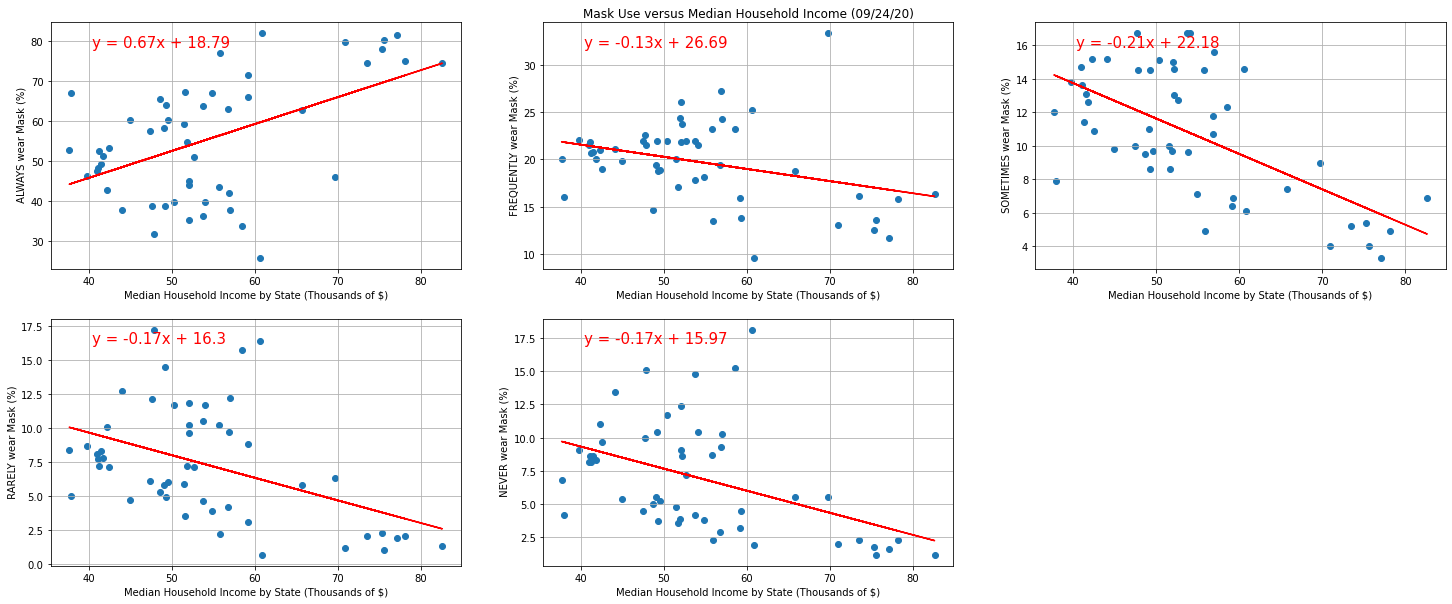

In [19]:
# Plot Mask Use versus county & state
import time
from scipy.stats import linregress

plt.figure(figsize=(25,10))
for i, c in enumerate(["ALWAYS", "FREQUENTLY", "SOMETIMES", "RARELY", "NEVER"]):
    
    plt.subplot(2, 3, i+1)
    x = df_merge["B19013_001E"]/1000
    y = df_merge[c] * 100
    plt.scatter(x, y, linewidths=1, marker="o")
    if i==1:
        plt.title("Mask Use versus Median Household Income (%s)" % time.strftime("%x"))
    plt.xlabel("Median Household Income by State (Thousands of $)")
    plt.ylabel(" "+c+" wear Mask (%)")
    plt.grid(True)
    
    slope, intercept, r_value, p_value, stderr=linregress(x, y)
    plt.plot(x, slope*x+intercept,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (0.1, 0.9), fontsize=15, color="red", xycoords= "axes fraction")
    

ALWAYS
The correlation coefficient (r) is 0.5
The p-value is 0.00016561161576270333
The r-squared is: 0.2535321786104579



FREQUENTLY
The correlation coefficient (r) is -0.33
The p-value is 0.016611992492161082
The r-squared is: 0.11154253847616385



SOMETIMES
The correlation coefficient (r) is -0.62
The p-value is 1.0566694299627643e-06
The r-squared is: 0.38795104412265596



RARELY
The correlation coefficient (r) is -0.45
The p-value is 0.0009899919982190668
The r-squared is: 0.20034749401575316



NEVER
The correlation coefficient (r) is -0.45
The p-value is 0.0009336122561369706
The r-squared is: 0.20213549502844508





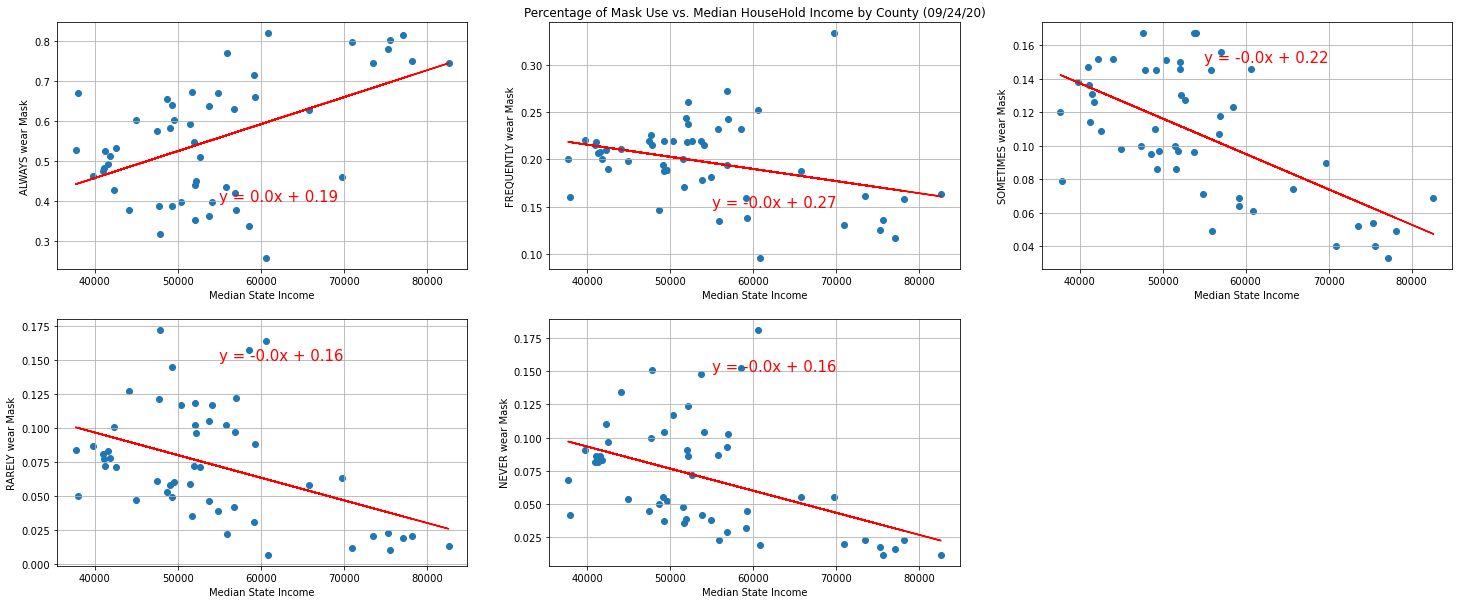

In [20]:
# Plot Mask Use versus county & state
df = census_MHI_sorted.groupby("State Name")["B19013_001E"].median().reset_index()
df_merge = mask_covid_data_clean.merge(df, on=("State Name"))

import time
# import scipy.stats as sts
from scipy.stats import linregress

plt.figure(figsize=(25,10))

plt.subplot(2, 3, 1)

plt.scatter(df_merge["B19013_001E"], df_merge["ALWAYS"], linewidths=1, marker="o")

x = df_merge["B19013_001E"]
y = df_merge["ALWAYS"]
slope, intercept, r_value, p_value, stderr=linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (55000, 0.4), fontsize=15, color="red")

plt.xlabel("Median State Income")
plt.ylabel("ALWAYS wear Mask")
plt.grid(True)

print("ALWAYS")
correlation = sts.pearsonr(x, y)
print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")
print(f"The r-squared is: {r_value**2}")
print("\n\n")

plt.subplot(2, 3, 2)

plt.scatter(df_merge["B19013_001E"], df_merge["FREQUENTLY"], linewidths=1, marker="o")

x = df_merge["B19013_001E"]
y = df_merge["FREQUENTLY"]
slope, intercept, r_value, p_value, stderr=linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (55000, 0.15), fontsize=15, color="red")

plt.title("Percentage of Mask Use vs. Median HouseHold Income by County (%s)" % time.strftime("%x"))


plt.xlabel("Median State Income")
plt.ylabel("FREQUENTLY wear Mask")
plt.grid(True)

print("FREQUENTLY")
correlation = sts.pearsonr(x, y)
print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")
print(f"The r-squared is: {r_value**2}")
print("\n\n")

plt.subplot(2, 3, 3)

plt.scatter(df_merge["B19013_001E"], df_merge["SOMETIMES"], linewidths=1, marker="o")
x = df_merge["B19013_001E"]
y = df_merge["SOMETIMES"]
slope, intercept, r_value, p_value, stderr=linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (55000, 0.15), fontsize=15, color="red")


plt.xlabel("Median State Income")
plt.ylabel("SOMETIMES wear Mask")
plt.grid(True)

print("SOMETIMES")
correlation = sts.pearsonr(x, y)
print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")
print(f"The r-squared is: {r_value**2}")
print("\n\n")

plt.subplot(2, 3, 4)

plt.scatter(df_merge["B19013_001E"], df_merge["RARELY"], linewidths=1, marker="o")
x = df_merge["B19013_001E"]
y = df_merge["RARELY"]
slope, intercept, r_value, p_value, stderr=linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (55000, 0.15), fontsize=15, color="red")

plt.xlabel("Median State Income")
plt.ylabel("RARELY wear Mask")
plt.grid(True)

print("RARELY")
correlation = sts.pearsonr(x, y)
print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")
print(f"The r-squared is: {r_value**2}")
print("\n\n")

plt.subplot(2, 3, 5)

plt.scatter(df_merge["B19013_001E"], df_merge["NEVER"], linewidths=1, marker="o")

x = df_merge["B19013_001E"]
y = df_merge["NEVER"]
slope, intercept, r_value, p_value, stderr=linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (55000, 0.15), fontsize=15, color="red")


plt.xlabel("Median State Income")
plt.ylabel("NEVER wear Mask")
plt.grid(True)

print("NEVER")
correlation = sts.pearsonr(x, y)
print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")
print(f"The r-squared is: {r_value**2}")
print("\n\n")


In [21]:
print(slope)


-1.6606591674967586e-06


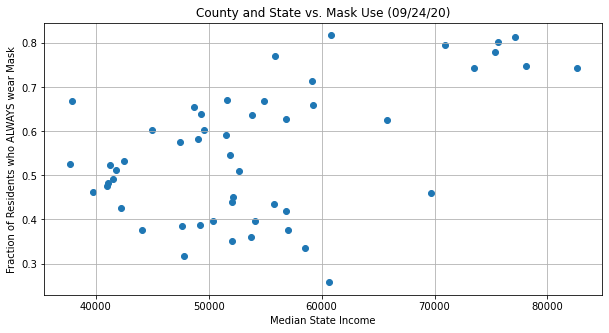

In [22]:
# Plot Mask Use versus county & state

import time

plt.figure(figsize=(10,5))


plt.scatter(df_merge["B19013_001E"], df_merge["ALWAYS"], linewidths=1, marker="o")
plt.title("County and State vs. Mask Use (%s)" % time.strftime("%x"))
plt.xlabel("Median State Income")
plt.ylabel("Fraction of Residents who ALWAYS wear Mask")
plt.grid(True)

# plt.savefig("Fig1.png")